In [1]:
import matplotlib.pyplot as plt
import numpy as np

import physipy
from physipy import s, m, setup_matplotlib

from physipy import Dimension, units, quantify, Quantity



ms = units["ms"]
mm = units['mm']
km = units["km"]
cm = units["cm"]


Ressources :
 - https://github.com/matplotlib/matplotlib/blob/97115aef5c18af5e48eb4ef041b6f48567088874/lib/matplotlib/axis.py#L1521
 
print(ax.xaxis.have_units())
print(ax.yaxis.have_units()) 
print(ax.xaxis.have_units())
print(ax.xaxis.converter)
print(ax.xaxis.units)
print(ax.xaxis.get_units())
print(ax.xaxis.set_units("totot"))

- See astropy for plotting context : https://docs.astropy.org/en/stable/_modules/astropy/visualization/units.html#quantity_support

- artist
https://github.com/matplotlib/matplotlib/blob/87119ea07357bc065bf729bfb7cd35e16dffe91b/lib/matplotlib/artist.py#L188

# Plotting with matplotlib

By default, Quantity' are plotted with their raw value, ie si-unit value

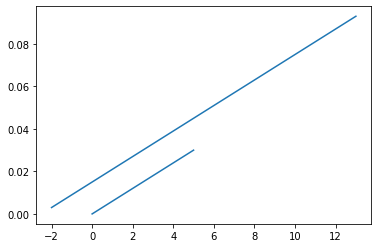

In [2]:
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.plot(3*x-2*s, 3*y+3*mm)

# Plotting with matplotlib in a context

Using a context to only use the Quantity interface for plotting :

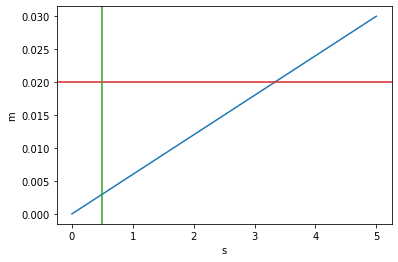

In [3]:
with physipy.quantity.plot.plotting_context():
    y = np.linspace(0, 30) * mm
    x = np.linspace(0, 5) * s
    
    fig, ax = plt.subplots()
    ax.plot(x, y, 'tab:blue')
    ax.axhline(0.02 * m, color='tab:red')
    ax.axvline(500*ms, color='tab:green')

Then outside the context the behaviour is the same as by default, ie without calling `setup_matplotlib()`:

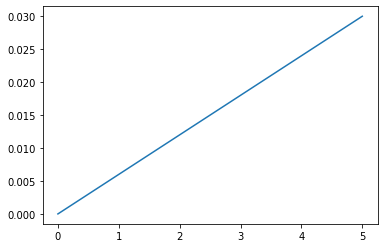

In [5]:
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')

# Plotting with matplotlib

Examples taken from [pint](https://pint.readthedocs.io/en/stable/plotting.html).
Make sure you enable units handling in matplotlib with `setup_matplotlib`

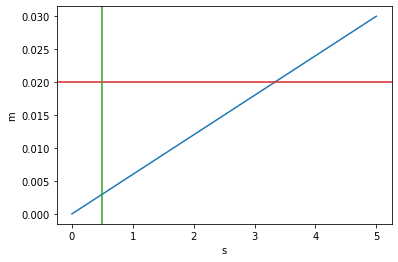

In [11]:
setup_matplotlib()

y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.axhline(0.02 * m, color='tab:red')
ax.axvline(500*ms, color='tab:green')

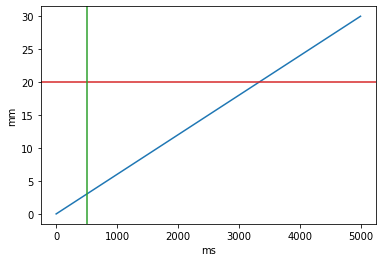

In [4]:
import matplotlib.pyplot as plt
import numpy as np

y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
ax.yaxis.set_units(mm)
ax.xaxis.set_units(ms)

ax.plot(x, y, 'tab:blue')
ax.axhline(0.02 * m, color='tab:red')
ax.axvline(500*ms, color='tab:green')

The axis units can be changed after the values are plotted as wellimport matplotlib.pyplot as plt
import numpy as np

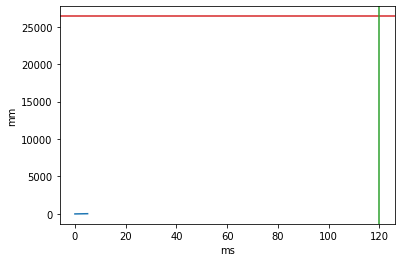

In [10]:
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * ms

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.axhline(26400 * mm, color='tab:red')
ax.axvline(120 * ms, color='tab:green')
ax.yaxis.set_units(mm)
ax.xaxis.set_units(ms)
ax.autoscale_view()

# Plotting with favunit

If the Quantity objects that are called in `ax.plot` have favunit, it will be used by default as the axis's unit.

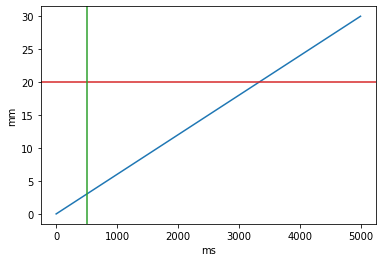

In [5]:
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s
y.favunit = mm # no need to call ax.yaxis.set_units(mm)
x.favunit = ms # no need to call ax.xaxis.set_units(ms)

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.axhline(0.02 * m, color='tab:red')
ax.axvline(500*ms, color='tab:green')

# Known issues

## axvline and friends

Without units implemented, the `axvline` and friend use a comparison to the axis values which are by default floats. Hence the comparaison with a quantity that have a dimension fails. It works with a dimensionless Quantity because of quantify turns the axis values to Quanities, and the comparison works

In [2]:
# restart kernel
import sys
sys.path.insert(0, r"/Users/mocquin/Documents/CLE/Optique/Python/JUPYTER/MYLIB10/MODULES/physipy")
import matplotlib.pyplot as plt
import numpy as np

import physipy
from physipy import s, m, setup_matplotlib
from physipy import Dimension, units, quantify, Quantity


ms = units["ms"]
mm = units['mm']
km = units["km"]
cm = units["cm"]


Without setup : 

Dimension error : dimensions of operands are T and no-dimension, and are differents.


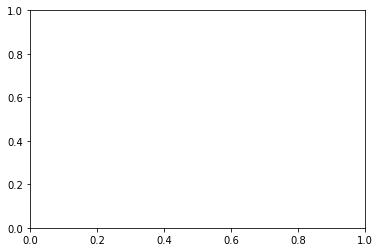

In [5]:
try:
    plt.axvline(3*s)
except Exception as e:
    print(e)

Without setup but plotting a dimensionless Quantity

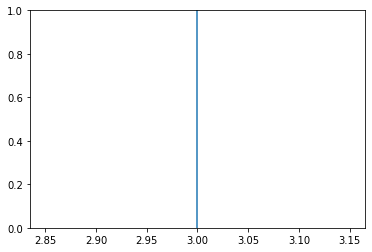

In [7]:
plt.axvline(Quantity(3, Dimension(None)))

Works when calling setup_matplotlib() : 

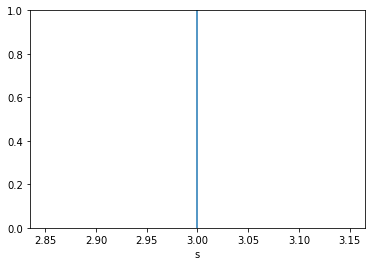

In [9]:
setup_matplotlib()
try:
    plt.axvline(3*s)
except Exception as e:
    print(e)